In [11]:
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image # image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

In [12]:
cols = ["prior","bio_cons","batch_int","total","train_loss","val_loss","time","kl_scal","prior_par"]
colnames = ["Prior","Bio Cons","Batch Int","Total","Train Loss","Val Loss","Time","KL Scal","Prior Par"]
col_to_name = dict(zip(cols, colnames))

In [55]:
prior = ["SN", "MG", "VP", "NF", "SN_opt", "MG_opt", "VP_opt", "NF_opt"]
bio_cons = np.array([0.65,0.625,0.625,0.625,0.69,0.685,0.605,0.625])
batch_int = np.array([0.2904,0.430,0.390,0.410,0.3,0.47,0.43,0.41])
total = (bio_cons+batch_int)/2
train_loss = np.array([886,880,882,882,float("nan"),float("nan"),float("nan"),float("nan")])
val_loss = np.array([891,900,911,885,float("nan"),float("nan"),float("nan"),float("nan")])
time = np.array([12.95,14.95,16.49,23.76,float("nan"),float("nan"),float("nan"),float("nan")])
prior_par = np.array([float("nan"),50,50,8,float("nan"),500,500,8])
kl_scale = np.array([5,5,5,5,0,5,5,5])
data = np.transpose(np.array([prior, bio_cons, batch_int, total, train_loss, val_loss, time, kl_scale, prior_par]))

In [56]:
df = pd.DataFrame(data,columns=cols)
df = df.rename(col_to_name, axis=1)
df = df.set_index("Prior")
df = df.sort_values("Total",ascending=False)
df[["Bio Cons","Batch Int","Total"]] = df[["Bio Cons","Batch Int","Total"]].astype("float64").round(2)
df[["Time"]] = df[["Time"]].astype("float64").round(1)
df[["Train Loss","Val Loss","KL Scal","Prior Par"]] = df[["Train Loss","Val Loss","KL Scal","Prior Par"]].astype("float64")


In [57]:
col_defs = (
    [
        ColumnDefinition(
            name="Prior",
            textprops={"ha": "left", "weight": "bold"},
            width=1.5
        ),
        ColumnDefinition(
            name="Bio Cons",
            group="Benchmark",
            width=1.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.5},
            },
            cmap=normed_cmap(df["Bio Cons"], cmap=matplotlib.cm.PRGn, num_stds=2.5)
        ),
        ColumnDefinition(
            name="Batch Int",
            group="Benchmark",
            width=1.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.5},
            },
            cmap=normed_cmap(df["Batch Int"], cmap=matplotlib.cm.PRGn, num_stds=2.5),
        ),
        ColumnDefinition(
            name="Total",
            group="Benchmark",
            width=1.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.5},
            },
            cmap=normed_cmap(df["Total"], cmap=matplotlib.cm.PRGn, num_stds=2.5),
        ),
        ColumnDefinition(
            name="Train Loss",
            group="Training",
            width=1.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.25},
            },
            cmap=normed_cmap(df["Train Loss"], cmap=matplotlib.cm.PRGn_r, num_stds=2.5),
        ),
        ColumnDefinition(
            name="Val Loss",
            group="Training",
            width=1.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.25},
            },
            cmap=normed_cmap(df["Val Loss"], cmap=matplotlib.cm.PRGn_r, num_stds=2.5),
        ),
        ColumnDefinition(
            name="Time",
            group="Training",
            width=1.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.5},
            },
            cmap=normed_cmap(df["Time"], cmap=matplotlib.cm.PRGn_r, num_stds=2.5),
        ),
        ColumnDefinition(
            name="KL Scal",
            group="Parameters",
            width=1.5,
            textprops={
                "ha": "center",
            }
        ),
        ColumnDefinition(
            name="Prior Par",
            group="Parameters",
            width=1.5,
            textprops={
                "ha": "center"
            }
        ),
        
    ]

)

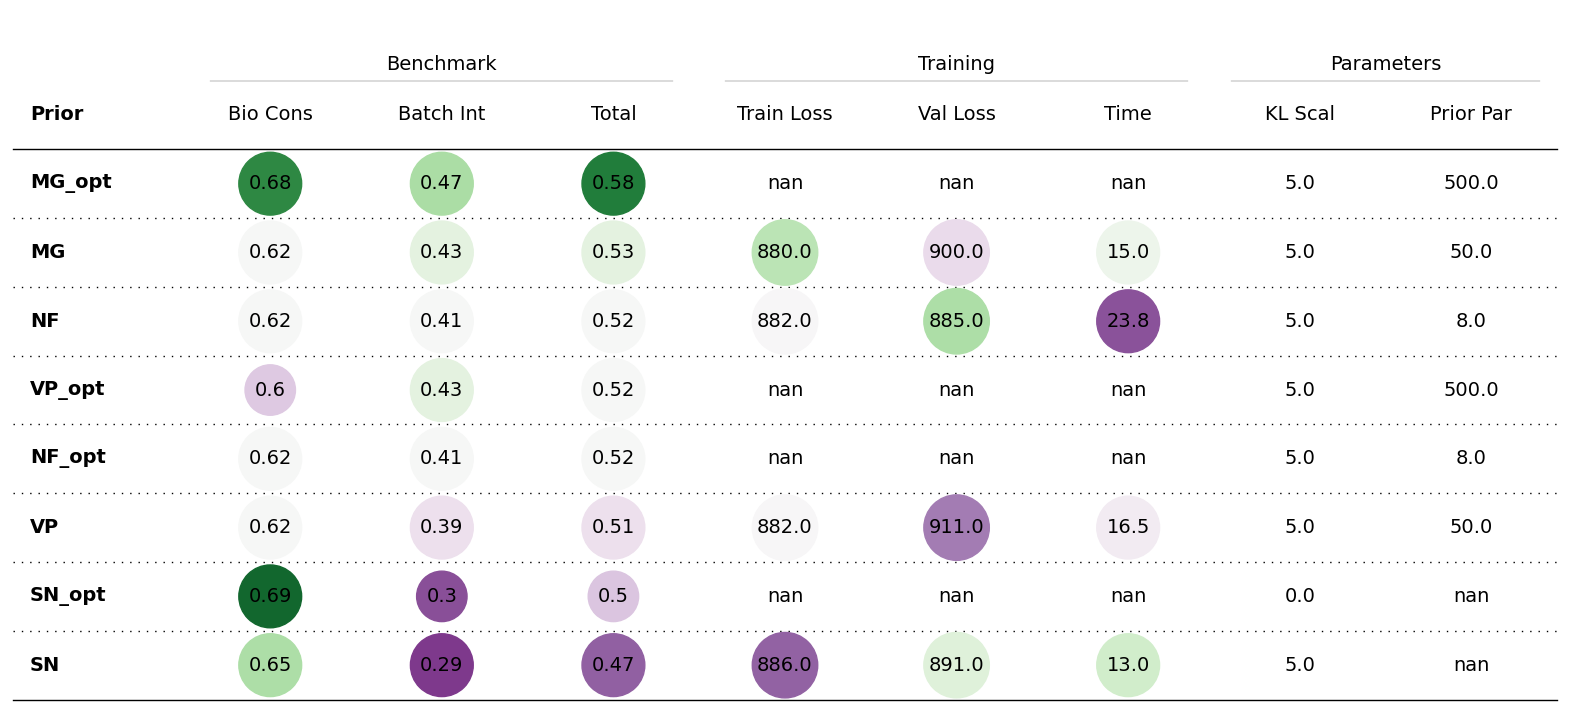

In [58]:
fig, ax = plt.subplots(figsize=(20, 9))

table = Table(
    df,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
)#.autoset_fontcolors(colnames=["OFF", "DEF"])

#fig.savefig("images/wwc_table.png", facecolor=ax.get_facecolor(), dpi=200)

(0.5, 0.75)

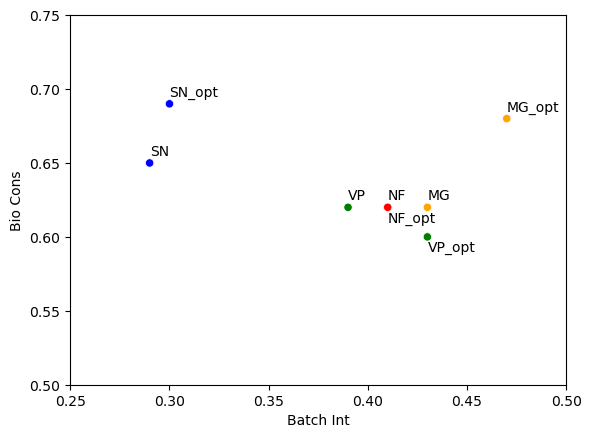

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so

plot = sns.scatterplot(data=df, x="Batch Int", y="Bio Cons",hue="PriorOld",color="PriorOld",legend=None,palette=["orange","red","green","blue"])
ind = df.index.tolist()
up = [True, True, True, False, False, True, True, True]
for i in range(df.shape[0]):
    if up[i]:
        plt.annotate(df["Prior"][i],(df["Batch Int"][i],df["Bio Cons"][i]+0.005))
    else:
        plt.annotate(df["Prior"][i],(df["Batch Int"][i],df["Bio Cons"][i]-0.01))
plot.set_xlim(0.25,0.5)
plot.set_ylim(0.5,0.75)